# TP Clustering

In [88]:
from sklearn.datasets import fetch_openml
import numpy as np
from scipy.io import arff
import pandas as weeb
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score
from time import time, process_time

## 1 - Jeux de données
On choisit dans le dataset quelques exemples afin de respecter les propriétés demandés :
- connexe & bien separe & sans donnees bruitees : **dartboard1** et **diamond9**
- non connexe & mal separe : **elly-2d10c13s**
- densite variable : **compound**
- densite similaire : **aggregation**
- avec donnees bruitees : **zelnik4**

In [2]:
data = arff.loadarff('dataset/aggregation.arff')
df = weeb.DataFrame(data[0])

In [3]:
df.head()

x      y class
0  15.55  28.65  b'2'
1  14.90  27.55  b'2'
2  14.45  28.35  b'2'
3  14.15  28.80  b'2'
4  13.75  28.05  b'2'

In [4]:
def getCoords(name, path='dataset/'):
    data = arff.loadarff(path+name+'.arff')[0]
    Xlist = []
    Ylist = []
    Zlist = []
    for elem in data:
        Xlist.append(elem[0])
        Ylist.append(elem[1])
        Zlist.append(elem[2])
    
    return Xlist, Ylist, Zlist

def showData(name, path='dataset/'):
    data = arff.loadarff(path+name+'.arff')[0]
    x, y, z = getCoords(name, path)
    plt.scatter(x, y, c=z)
    plt.show()

## 2 - Clustering k-Means

Pour commencer, parmi les jeux de données retenus, on choisi celui présentant des formes connexes bien identifiées : **diamond9**

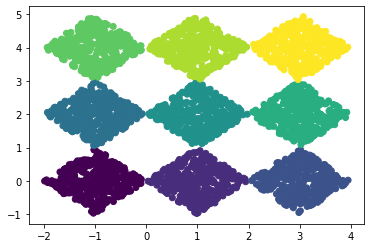

In [5]:
showData('diamond9')

On va appliquer l'algorithme K-Means dessus

In [6]:
x, y, z = getCoords('diamond9')
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

temps d'execution fit: 0.039s


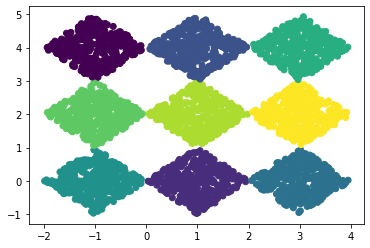

In [7]:
kMS = KMeans(init='k-means++', n_clusters=9)
t1 = process_time()
kMS.fit(train_data)
t2 = process_time()
print("temps d'execution fit: "+str(t2 - t1)[:5]+"s")
label = kMS.labels_
plt.scatter(x, y, c=label)
plt.show()

In [8]:
# Calcul score en fonction de k

L_test = np.zeros((18,3)) # (nb_clusters, temps d'exec, score)
for i in range(2,20):
    # Clustering
    kMS = KMeans(init='k-means++', n_clusters=i)
    t1 = process_time()
    kMS.fit(train_data)
    t2 = process_time()
    t_diff = t2 - t1
    #print("[k = "+str(i)+"] temps d'execution fit: "+str(t_diff)[:5]+"s")
    label = kMS.labels_
    
    # Metrics
    score = silhouette_score(train_data, label)
    #print("[k = "+str(i)+"] score: "+str(score)[:5])
    
    L_test[i-2] = np.array((i, t_diff, score))

[k = 2.0] temps d'execution fit: 0.026s, score = 0.3517912447511314
[k = 3.0] temps d'execution fit: 0.178s, score = 0.38789120223882256
[k = 4.0] temps d'execution fit: 0.301s, score = 0.3931887797313925
[k = 5.0] temps d'execution fit: 0.354s, score = 0.414365689204434
[k = 6.0] temps d'execution fit: 0.322s, score = 0.413403904420764
[k = 7.0] temps d'execution fit: 0.334s, score = 0.4541980048926319
[k = 8.0] temps d'execution fit: 0.283s, score = 0.5011566648737813
[k = 9.0] temps d'execution fit: 0.261s, score = 0.5487372352385035
[k = 10.0] temps d'execution fit: 0.300s, score = 0.5219216450006872
[k = 11.0] temps d'execution fit: 0.398s, score = 0.4965950116702461
[k = 12.0] temps d'execution fit: 0.420s, score = 0.46534758846461166
[k = 13.0] temps d'execution fit: 0.472s, score = 0.4311777157204303
[k = 14.0] temps d'execution fit: 0.567s, score = 0.412009077180304
[k = 15.0] temps d'execution fit: 0.545s, score = 0.39840790228922585
[k = 16.0] temps d'execution fit: 0.599s, 

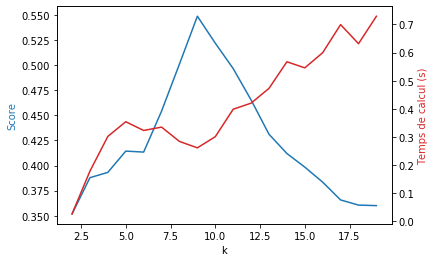

In [9]:
# Affichage score

for i in range(len(L_test)):
    [k, t_diff, score] = L_test[i]
    print("[k = "+str(k)+"] temps d'execution fit: "+str(t_diff)[:5]+"s, score = "+str(score))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("k")
ax1.set_ylabel("Score", color="tab:blue")
ax1.plot(L_test[:,0], L_test[:,2], color="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Temps de calcul (s)", color="tab:red")
ax2.plot(L_test[:,0], L_test[:,1], color="tab:red")

plt.show()

In [10]:
def getPerfectClusters(name, path='dataset/', show=True):
    if show:
        showData(name, path)
        
    x, y, z = getCoords(name, path)
    train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)
    
    # Calcul score en fonction de k

    L_test = np.zeros((18,3)) # (nb_clusters, temps d'exec, score)
    for i in range(2,20):
        # Clustering
        kMS = KMeans(init='k-means++', n_clusters=i)
        t1 = process_time()
        kMS.fit(train_data)
        t2 = process_time()
        t_diff = t2 - t1
        #print("[k = "+str(i)+"] temps d'execution fit: "+str(t_diff)[:5]+"s")
        label = kMS.labels_
    
        # Metrics
        score = silhouette_score(train_data, label)
        #print("[k = "+str(i)+"] score: "+str(score)[:5])
    
        L_test[i-2] = np.array((i, t_diff, score))

    # Affichage score

    for i in range(len(L_test)):
        [k, t_diff, score] = L_test[i]
        print("[k = "+str(k)+"] temps d'execution fit: "+str(t_diff)[:5]+"s, score = "+str(score)[:5])
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("k")
    ax1.set_ylabel("Score", color="tab:blue")
    ax1.plot(L_test[:,0], L_test[:,2], color="tab:blue")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Temps de calcul (s)", color="tab:red")
    ax2.plot(L_test[:,0], L_test[:,1], color="tab:red")

    plt.show()
    
    # Recuperation max et affichage
    m = 0
    index = 0
    for i in range(len(L_test)):
        if (L_test[i,2] > m):
            m = L_test[i, 2]
            index = i
    print("MAX : [k = "+str(L_test[index, 0])+"] temps d'execution fit: "+str(L_test[index, 1])[:5]+"s, score = "+str(L_test[index, 2])[:5])
    kMS = KMeans(init='k-means++', n_clusters= int(L_test[index, 0]))
    kMS.fit(train_data)
    label = kMS.labels_
    plt.scatter(x, y, c=label)
    plt.show()

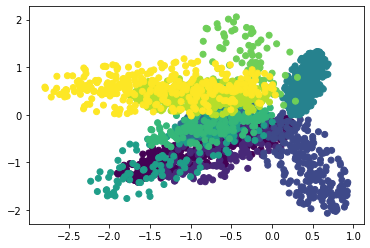

[k = 2.0] temps d'execution fit: 0.026s, score = 0.329
[k = 3.0] temps d'execution fit: 0.224s, score = 0.343
[k = 4.0] temps d'execution fit: 0.371s, score = 0.408
[k = 5.0] temps d'execution fit: 0.304s, score = 0.431
[k = 6.0] temps d'execution fit: 0.406s, score = 0.395
[k = 7.0] temps d'execution fit: 0.701s, score = 0.407
[k = 8.0] temps d'execution fit: 0.906s, score = 0.403
[k = 9.0] temps d'execution fit: 0.873s, score = 0.400
[k = 10.0] temps d'execution fit: 0.965s, score = 0.408
[k = 11.0] temps d'execution fit: 0.640s, score = 0.406
[k = 12.0] temps d'execution fit: 0.608s, score = 0.397
[k = 13.0] temps d'execution fit: 0.752s, score = 0.393
[k = 14.0] temps d'execution fit: 0.803s, score = 0.394
[k = 15.0] temps d'execution fit: 0.743s, score = 0.387
[k = 16.0] temps d'execution fit: 0.869s, score = 0.384
[k = 17.0] temps d'execution fit: 0.943s, score = 0.379
[k = 18.0] temps d'execution fit: 0.795s, score = 0.376
[k = 19.0] temps d'execution fit: 1.047s, score = 0.369


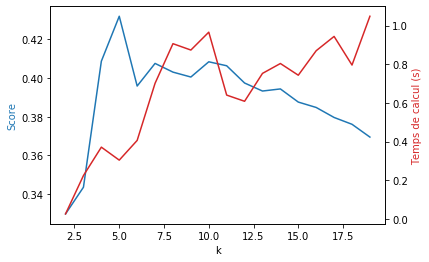

MAX : [k = 5.0] temps d'execution fit: 0.304s, score = 0.431


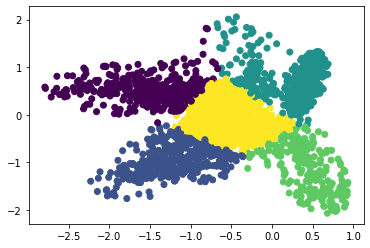

In [11]:
# methode k-Means itérative sur le nombre de clusters pour des formes convexe et mal separees (elly)
getPerfectClusters('elly-2d10c13s')

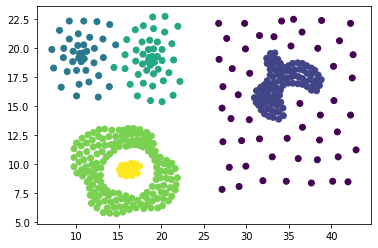

[k = 2.0] temps d'execution fit: 0.007s, score = 0.638
[k = 3.0] temps d'execution fit: 0.097s, score = 0.575
[k = 4.0] temps d'execution fit: 0.108s, score = 0.499
[k = 5.0] temps d'execution fit: 0.136s, score = 0.524
[k = 6.0] temps d'execution fit: 0.148s, score = 0.431
[k = 7.0] temps d'execution fit: 0.153s, score = 0.434
[k = 8.0] temps d'execution fit: 0.166s, score = 0.426
[k = 9.0] temps d'execution fit: 0.189s, score = 0.434
[k = 10.0] temps d'execution fit: 0.203s, score = 0.423
[k = 11.0] temps d'execution fit: 0.203s, score = 0.406
[k = 12.0] temps d'execution fit: 0.206s, score = 0.443
[k = 13.0] temps d'execution fit: 0.245s, score = 0.411
[k = 14.0] temps d'execution fit: 0.225s, score = 0.393
[k = 15.0] temps d'execution fit: 0.258s, score = 0.397
[k = 16.0] temps d'execution fit: 0.273s, score = 0.385
[k = 17.0] temps d'execution fit: 0.271s, score = 0.386
[k = 18.0] temps d'execution fit: 0.305s, score = 0.403
[k = 19.0] temps d'execution fit: 0.289s, score = 0.383


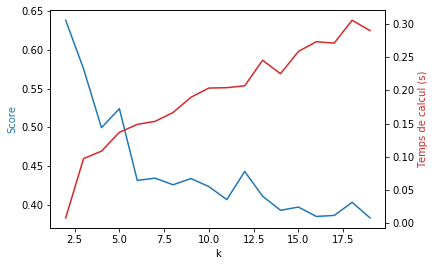

MAX : [k = 2.0] temps d'execution fit: 0.007s, score = 0.638


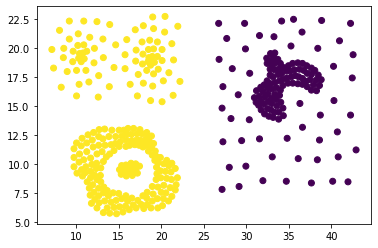

In [12]:
# methode k-Means itérative sur le nombre de clusters pour des formes de densite variable (compound)
getPerfectClusters('compound')

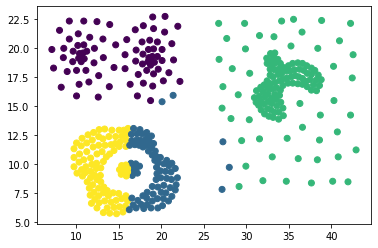

In [13]:
x, y, z = getCoords('compound')
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)
kMS = KMeans(init='k-means++', n_clusters= 4)
kMS.fit(train_data)
label = kMS.labels_
plt.scatter(x, y, c=label)
plt.show()

## 3 - Clustering agglomératif

In [14]:
x, y, z = getCoords('diamond9')
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

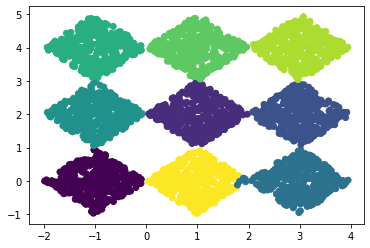

In [15]:
Aclus = AgglomerativeClustering(n_clusters= 9)
Aclus.fit(train_data)
label = Aclus.labels_
plt.scatter(x, y, c=label)
plt.show()

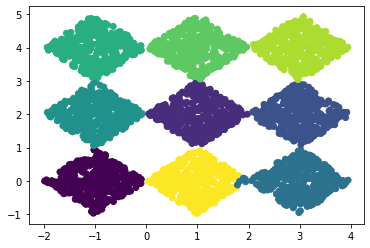

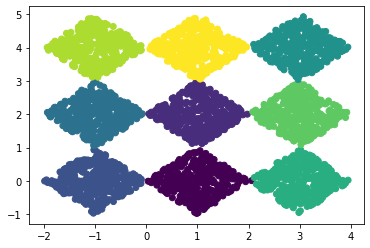

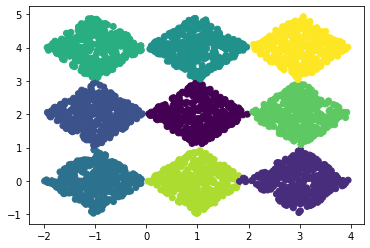

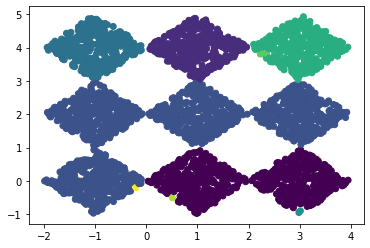

In [16]:
link = ["ward", "complete", "average", "single"]

for i in range(4):
    Aclus = AgglomerativeClustering(n_clusters= 9, linkage=link[i])
    Aclus.fit(train_data)
    label = Aclus.labels_
    plt.scatter(x, y, c=label)
    plt.show()

In [17]:
# Calcul score en fonction de k

L_test = np.zeros((18,3)) # (nb_clusters, temps d'exec, score)
for i in range(2,20):
    # Clustering
    Aclus = AgglomerativeClustering(n_clusters= i)
    t1 = process_time()
    Aclus.fit(train_data)
    t2 = process_time()
    t_diff = t2 - t1
    label = Aclus.labels_
    
    # Metrics
    score = silhouette_score(train_data, label)
    
    L_test[i-2] = np.array((i, t_diff, score))

[k = 2.0] temps d'execution fit: 0.117s, score = 0.35203592601411354
[k = 3.0] temps d'execution fit: 0.685s, score = 0.3821818534787049
[k = 4.0] temps d'execution fit: 0.685s, score = 0.38747470533834794
[k = 5.0] temps d'execution fit: 0.685s, score = 0.40762667646207706
[k = 6.0] temps d'execution fit: 0.685s, score = 0.4110332726737219
[k = 7.0] temps d'execution fit: 0.695s, score = 0.44602737659698705
[k = 8.0] temps d'execution fit: 0.685s, score = 0.49434387283123116
[k = 9.0] temps d'execution fit: 0.685s, score = 0.5479013817001807
[k = 10.0] temps d'execution fit: 0.686s, score = 0.5174546130279948
[k = 11.0] temps d'execution fit: 0.685s, score = 0.48850075163233325
[k = 12.0] temps d'execution fit: 0.686s, score = 0.45601253654619023
[k = 13.0] temps d'execution fit: 0.685s, score = 0.43278942521996777
[k = 14.0] temps d'execution fit: 0.687s, score = 0.40459508774465774
[k = 15.0] temps d'execution fit: 0.698s, score = 0.39069482053423293
[k = 16.0] temps d'execution fit

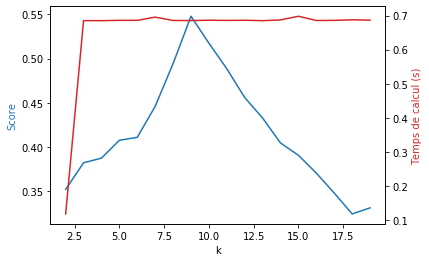

In [18]:
# Affichage score

for i in range(len(L_test)):
    [k, t_diff, score] = L_test[i]
    print("[k = "+str(k)+"] temps d'execution fit: "+str(t_diff)[:5]+"s, score = "+str(score))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("k")
ax1.set_ylabel("Score", color="tab:blue")
ax1.plot(L_test[:,0], L_test[:,2], color="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Temps de calcul (s)", color="tab:red")
ax2.plot(L_test[:,0], L_test[:,1], color="tab:red")

plt.show()

In [19]:
def getPerfectClustersAgg(name, path='dataset/', show=True):
    if show:
        showData(name, path)
        
    x, y, z = getCoords(name, path)
    train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)
    
    # Calcul score en fonction de k

    L_test = np.zeros((18,3)) # (nb_clusters, temps d'exec, score)
    for i in range(2,20):
        # Clustering
        AClus = AgglomerativeClustering(n_clusters=i)
        t1 = process_time()
        AClus.fit(train_data)
        t2 = process_time()
        t_diff = t2 - t1
        label = AClus.labels_
    
        # Metrics
        score = silhouette_score(train_data, label)    
        L_test[i-2] = np.array((i, t_diff, score))

    # Affichage score

    for i in range(len(L_test)):
        [k, t_diff, score] = L_test[i]
        print("[k = "+str(k)+"] temps d'execution fit: "+str(t_diff)[:5]+"s, score = "+str(score)[:5])
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("k")
    ax1.set_ylabel("Score", color="tab:blue")
    ax1.plot(L_test[:,0], L_test[:,2], color="tab:blue")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Temps de calcul (s)", color="tab:red")
    ax2.plot(L_test[:,0], L_test[:,1], color="tab:red")

    plt.show()
    
    # Recuperation max et affichage
    m = 0
    index = 0
    for i in range(len(L_test)):
        if (L_test[i,2] > m):
            m = L_test[i, 2]
            index = i
    print("MAX : [k = "+str(L_test[index, 0])+"] temps d'execution fit: "+str(L_test[index, 1])[:5]+"s, score = "+str(L_test[index, 2])[:5])
    AclusBest = AgglomerativeClustering(n_clusters= int(L_test[index, 0]))
    AclusBest.fit(train_data)
    label = AclusBest.labels_
    plt.scatter(x, y, c=label)
    plt.show()

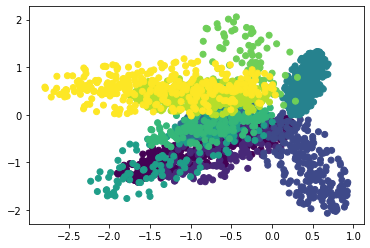

[k = 2.0] temps d'execution fit: 0.096s, score = 0.300
[k = 3.0] temps d'execution fit: 0.591s, score = 0.326
[k = 4.0] temps d'execution fit: 0.591s, score = 0.364
[k = 5.0] temps d'execution fit: 0.592s, score = 0.356
[k = 6.0] temps d'execution fit: 0.591s, score = 0.362
[k = 7.0] temps d'execution fit: 0.601s, score = 0.376
[k = 8.0] temps d'execution fit: 0.593s, score = 0.367
[k = 9.0] temps d'execution fit: 0.592s, score = 0.359
[k = 10.0] temps d'execution fit: 0.592s, score = 0.357
[k = 11.0] temps d'execution fit: 0.590s, score = 0.367
[k = 12.0] temps d'execution fit: 0.591s, score = 0.364
[k = 13.0] temps d'execution fit: 0.591s, score = 0.352
[k = 14.0] temps d'execution fit: 0.592s, score = 0.352
[k = 15.0] temps d'execution fit: 0.592s, score = 0.349
[k = 16.0] temps d'execution fit: 0.591s, score = 0.344
[k = 17.0] temps d'execution fit: 0.591s, score = 0.344
[k = 18.0] temps d'execution fit: 0.592s, score = 0.338
[k = 19.0] temps d'execution fit: 0.591s, score = 0.322


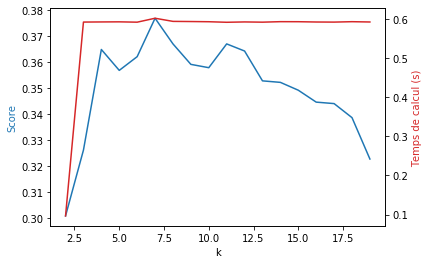

MAX : [k = 7.0] temps d'execution fit: 0.601s, score = 0.376


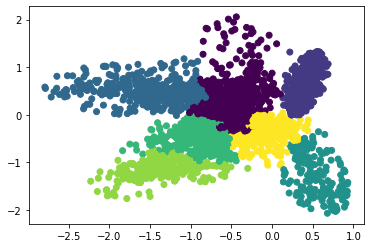

In [20]:
getPerfectClustersAgg('elly-2d10c13s')

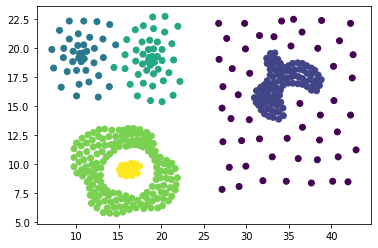

[k = 2.0] temps d'execution fit: 0.002s, score = 0.638
[k = 3.0] temps d'execution fit: 0.014s, score = 0.575
[k = 4.0] temps d'execution fit: 0.013s, score = 0.549
[k = 5.0] temps d'execution fit: 0.018s, score = 0.509
[k = 6.0] temps d'execution fit: 0.012s, score = 0.417
[k = 7.0] temps d'execution fit: 0.012s, score = 0.420
[k = 8.0] temps d'execution fit: 0.012s, score = 0.421
[k = 9.0] temps d'execution fit: 0.012s, score = 0.410
[k = 10.0] temps d'execution fit: 0.012s, score = 0.419
[k = 11.0] temps d'execution fit: 0.012s, score = 0.411
[k = 12.0] temps d'execution fit: 0.012s, score = 0.419
[k = 13.0] temps d'execution fit: 0.012s, score = 0.393
[k = 14.0] temps d'execution fit: 0.012s, score = 0.396
[k = 15.0] temps d'execution fit: 0.012s, score = 0.378
[k = 16.0] temps d'execution fit: 0.012s, score = 0.364
[k = 17.0] temps d'execution fit: 0.012s, score = 0.366
[k = 18.0] temps d'execution fit: 0.012s, score = 0.369
[k = 19.0] temps d'execution fit: 0.012s, score = 0.369


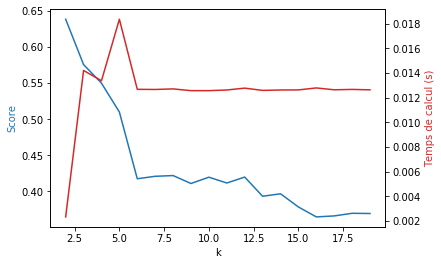

MAX : [k = 2.0] temps d'execution fit: 0.002s, score = 0.638


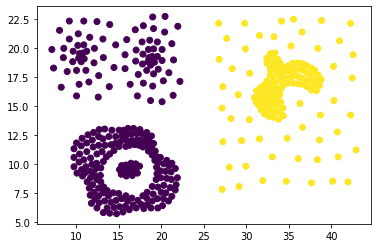

In [21]:
getPerfectClustersAgg('compound')

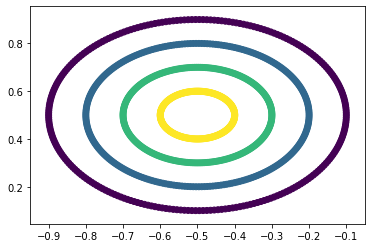

[k = 2.0] temps d'execution fit: 0.013s, score = 0.279
[k = 3.0] temps d'execution fit: 0.094s, score = 0.303
[k = 4.0] temps d'execution fit: 0.093s, score = 0.277
[k = 5.0] temps d'execution fit: 0.093s, score = 0.283
[k = 6.0] temps d'execution fit: 0.081s, score = 0.290
[k = 7.0] temps d'execution fit: 0.064s, score = 0.282
[k = 8.0] temps d'execution fit: 0.064s, score = 0.299
[k = 9.0] temps d'execution fit: 0.064s, score = 0.294
[k = 10.0] temps d'execution fit: 0.064s, score = 0.303
[k = 11.0] temps d'execution fit: 0.064s, score = 0.313
[k = 12.0] temps d'execution fit: 0.065s, score = 0.314
[k = 13.0] temps d'execution fit: 0.064s, score = 0.311
[k = 14.0] temps d'execution fit: 0.064s, score = 0.311
[k = 15.0] temps d'execution fit: 0.064s, score = 0.299
[k = 16.0] temps d'execution fit: 0.064s, score = 0.298
[k = 17.0] temps d'execution fit: 0.065s, score = 0.299
[k = 18.0] temps d'execution fit: 0.064s, score = 0.301
[k = 19.0] temps d'execution fit: 0.065s, score = 0.305


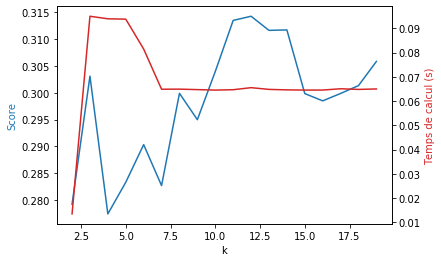

MAX : [k = 12.0] temps d'execution fit: 0.065s, score = 0.314


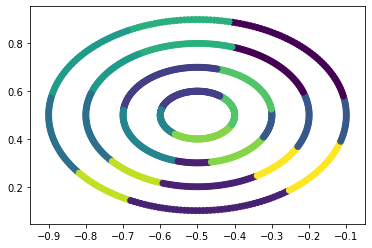

In [22]:
getPerfectClustersAgg('dartboard1')

## 4 - Clustering DBSCAN

In [23]:
x, y, z = getCoords('diamond9')
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

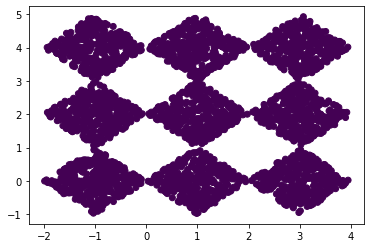

[0 0 0 ... 0 0 0]


In [24]:
db = DBSCAN()
db.fit(train_data)
label = db.labels_
plt.scatter(x, y, c=label)
plt.show()
print(label)

In [25]:
# Calcul score en fonction de eps : autour de 0.1
e = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1e-1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]

L_test = np.zeros((len(e),3)) # (eps, temps d'exec, score)
for i in range(len(e)):
    # Clustering
    db = DBSCAN(eps=e[i], min_samples=5)
    t1 = process_time()
    db.fit(train_data)
    t2 = process_time()
    t_diff = t2 - t1
    label = db.labels_
    
    # Metrics
    score = 0
    if (len(set(label)) >= 2):
        score = silhouette_score(train_data, label)    
    L_test[i] = np.array((e[i], t_diff, score))

[eps = 0.01] temps d'execution fit: 0.011s, score = 0.0
[eps = 0.02] temps d'execution fit: 0.010s, score = 0.0
[eps = 0.03] temps d'execution fit: 0.008s, score = -0.020403658309913055
[eps = 0.04] temps d'execution fit: 0.054s, score = -0.6677069449732588
[eps = 0.05] temps d'execution fit: 0.055s, score = -0.7409514931484684
[eps = 0.06] temps d'execution fit: 0.056s, score = -0.5780581584005592
[eps = 0.07] temps d'execution fit: 0.059s, score = -0.31109488449257955
[eps = 0.08] temps d'execution fit: 0.061s, score = -0.04852723395490881
[eps = 0.09] temps d'execution fit: 0.064s, score = 0.03444949091397961
[eps = 0.1] temps d'execution fit: 0.067s, score = 0.009791043364793087
[eps = 0.11] temps d'execution fit: 0.069s, score = 0.09737054243031726
[eps = 0.12] temps d'execution fit: 0.073s, score = 0.406884747537484
[eps = 0.13] temps d'execution fit: 0.267s, score = 0.4063322622995925
[eps = 0.14] temps d'execution fit: 0.077s, score = 0.2900472087823344
[eps = 0.15] temps d'exe

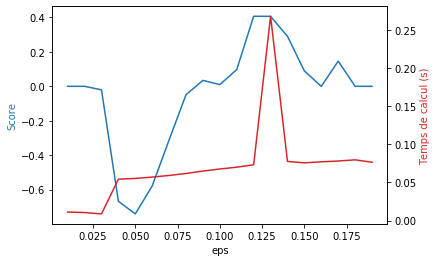

MAX : [eps = 0.12] temps d'execution fit: 0.073s, score = 0.406


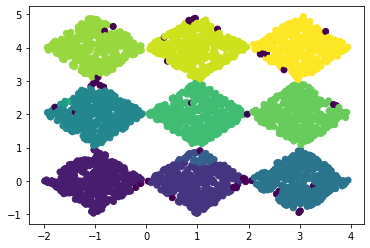

In [26]:
# Affichage score

for i in range(len(L_test)):
    [k, t_diff, score] = L_test[i]
    print("[eps = "+str(k)+"] temps d'execution fit: "+str(t_diff)[:5]+"s, score = "+str(score))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("eps")
ax1.set_ylabel("Score", color="tab:blue")
ax1.plot(L_test[:,0], L_test[:,2], color="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Temps de calcul (s)", color="tab:red")
ax2.plot(L_test[:,0], L_test[:,1], color="tab:red")

plt.show()

# Recuperation max et affichage
m = 0
index = 0
for i in range(len(L_test)):
    if (L_test[i,2] > m):
        m = L_test[i, 2]
        index = i
print("MAX : [eps = "+str(L_test[index, 0])+"] temps d'execution fit: "+str(L_test[index, 1])[:5]+"s, score = "+str(L_test[index, 2])[:5])
dbBest = db = DBSCAN(eps=L_test[index, 0], min_samples=5)
dbBest.fit(train_data)
label = dbBest.labels_
plt.scatter(x, y, c=label)
plt.show()

In [27]:
# Calcul score en fonction de eps : autour de 0.12
e = np.linspace(0.11, 0.13, num=20)

L_test = np.zeros((len(e),3)) # (eps, temps d'exec, score)
for i in range(len(e)):
    # Clustering
    db = DBSCAN(eps=e[i], min_samples=5)
    t1 = process_time()
    db.fit(train_data)
    t2 = process_time()
    t_diff = t2 - t1
    label = db.labels_
    
    # Metrics
    score = 0
    if (len(set(label)) >= 2):
        score = silhouette_score(train_data, label)    
    L_test[i] = np.array((e[i], t_diff, score))

[eps = 0.11] temps d'execution fit: 0.015s, score = 0.09737054243031726
[eps = 0.11105263157894738] temps d'execution fit: 0.070s, score = 0.116093318589905
[eps = 0.11210526315789474] temps d'execution fit: 0.070s, score = 0.21016165678016477
[eps = 0.11315789473684211] temps d'execution fit: 0.071s, score = 0.25817354811665183
[eps = 0.11421052631578947] temps d'execution fit: 0.070s, score = 0.2584645176607857
[eps = 0.11526315789473685] temps d'execution fit: 0.070s, score = 0.26121281618817244
[eps = 0.1163157894736842] temps d'execution fit: 0.071s, score = 0.32669174630366504
[eps = 0.11736842105263158] temps d'execution fit: 0.071s, score = 0.3758225810735448
[eps = 0.11842105263157895] temps d'execution fit: 0.071s, score = 0.3660304393903502
[eps = 0.11947368421052632] temps d'execution fit: 0.071s, score = 0.3686703787461861
[eps = 0.12052631578947369] temps d'execution fit: 0.071s, score = 0.406884747537484
[eps = 0.12157894736842105] temps d'execution fit: 0.071s, score = 

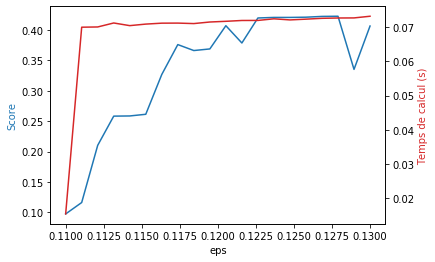

MAX : [eps = 0.12789473684210526] temps d'execution fit: 0.072s, score = 0.422


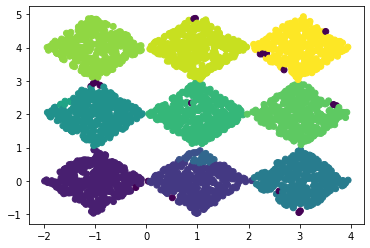

In [28]:
# Affichage score

for i in range(len(L_test)):
    [k, t_diff, score] = L_test[i]
    print("[eps = "+str(k)+"] temps d'execution fit: "+str(t_diff)[:5]+"s, score = "+str(score))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("eps")
ax1.set_ylabel("Score", color="tab:blue")
ax1.plot(L_test[:,0], L_test[:,2], color="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Temps de calcul (s)", color="tab:red")
ax2.plot(L_test[:,0], L_test[:,1], color="tab:red")

plt.show()

# Recuperation max et affichage
m = 0
index = 0
for i in range(len(L_test)):
    if (L_test[i,2] > m):
        m = L_test[i, 2]
        index = i
print("MAX : [eps = "+str(L_test[index, 0])+"] temps d'execution fit: "+str(L_test[index, 1])[:5]+"s, score = "+str(L_test[index, 2])[:5])
dbBest = db = DBSCAN(eps=L_test[index, 0], min_samples=5)
dbBest.fit(train_data)
label = dbBest.labels_
plt.scatter(x, y, c=label)
plt.show()

In [29]:
# Calcul score en fonction de min_samples : on fixe eps=0.128
ms = [2, 5, 10, 15, 20]

L_test = np.zeros((len(ms),3)) # (eps, temps d'exec, score)
for i in range(len(ms)):
    # Clustering
    db = DBSCAN(eps=0.128, min_samples=ms[i])
    t1 = process_time()
    db.fit(train_data)
    t2 = process_time()
    t_diff = t2 - t1
    label = db.labels_
    
    # Metrics
    score = 0
    if (len(set(label)) >= 2):
        score = silhouette_score(train_data, label)    
    L_test[i] = np.array((ms[i], t_diff, score))

[min_samples = 2.0] temps d'execution fit: 0.014s, score = 0.08202665728418104
[min_samples = 5.0] temps d'execution fit: 0.072s, score = 0.4224357979468951
[min_samples = 10.0] temps d'execution fit: 0.067s, score = 0.07411472182473469
[min_samples = 15.0] temps d'execution fit: 0.062s, score = -0.5871367556558306
[min_samples = 20.0] temps d'execution fit: 0.061s, score = 0.0


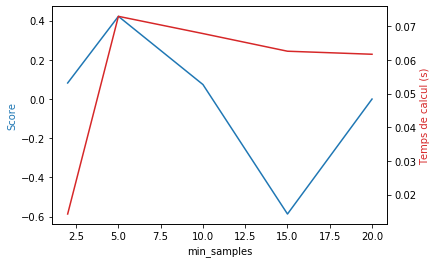

MAX : [min_samples = 5.0] temps d'execution fit: 0.072s, score = 0.422


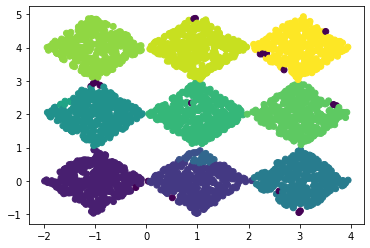

In [30]:
# Affichage score

for i in range(len(L_test)):
    [k, t_diff, score] = L_test[i]
    print("[min_samples = "+str(k)+"] temps d'execution fit: "+str(t_diff)[:5]+"s, score = "+str(score))
    
fig, ax1 = plt.subplots()
ax1.set_xlabel("min_samples")
ax1.set_ylabel("Score", color="tab:blue")
ax1.plot(L_test[:,0], L_test[:,2], color="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Temps de calcul (s)", color="tab:red")
ax2.plot(L_test[:,0], L_test[:,1], color="tab:red")

plt.show()

# Recuperation max et affichage
m = 0
index = 0
for i in range(len(L_test)):
    if (L_test[i,2] > m):
        m = L_test[i, 2]
        index = i
print("MAX : [min_samples = "+str(L_test[index, 0])+"] temps d'execution fit: "+str(L_test[index, 1])[:5]+"s, score = "+str(L_test[index, 2])[:5])
dbBest = db = DBSCAN(eps=0.128, min_samples=L_test[index, 0])
dbBest.fit(train_data)
label = dbBest.labels_
plt.scatter(x, y, c=label)
plt.show()

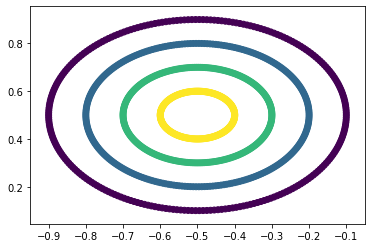

4


In [31]:
x,y,z = getCoords("dartboard1")
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

db = DBSCAN(min_samples = 5, eps=0.025)
db.fit(train_data)
label = db.labels_
plt.scatter(x, y, c=label)
plt.show()
print(len(set(label)))

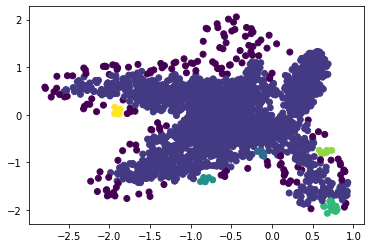

7


In [32]:
x,y,z = getCoords("elly-2d10c13s")
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

db = DBSCAN(min_samples = 5, eps=0.1)
db.fit(train_data)
label = db.labels_
plt.scatter(x, y, c=label)
plt.show()
print(len(set(label)))

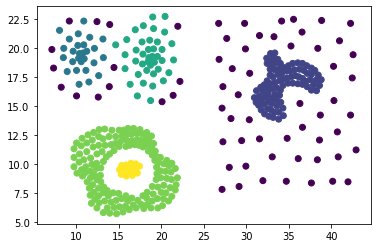

6


In [36]:
x,y,z = getCoords("compound")
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

db = DBSCAN(min_samples = 5, eps=1.4)
db.fit(train_data)
label = db.labels_
plt.scatter(x, y, c=label)
plt.show()
print(len(set(label)))

## 5 - Clustering HDBSCAN

In [37]:
import hdbscan

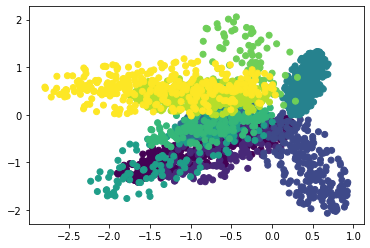

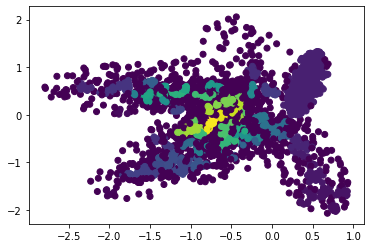

81


In [38]:
showData("elly-2d10c13s")

x,y,z = getCoords("elly-2d10c13s")
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

hdb = hdbscan.HDBSCAN(min_cluster_size=5)
hdb.fit(train_data)
label = hdb.labels_
plt.scatter(x, y, c=label)
plt.show()
print(len(set(label)))

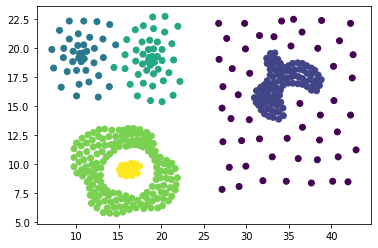

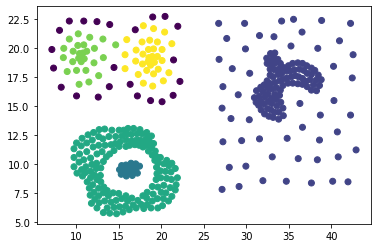

6


In [46]:
showData("compound")

x,y,z = getCoords("compound")
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

hdb = hdbscan.HDBSCAN(min_cluster_size=5)
hdb.fit(train_data)
label = hdb.labels_
plt.scatter(x, y, c=label)
plt.show()
print(len(set(label)))

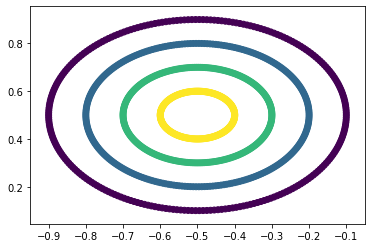

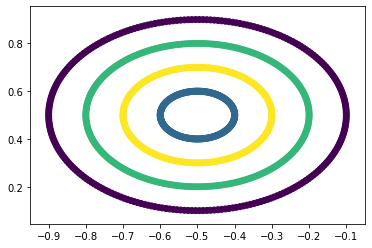

4


In [40]:
showData("dartboard1")

x,y,z = getCoords("dartboard1")
train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

hdb = hdbscan.HDBSCAN(min_cluster_size=5)
hdb.fit(train_data)
label = hdb.labels_
plt.scatter(x, y, c=label)
plt.show()
print(len(set(label)))

In [99]:
def hdbscan_silhouette_score(name, path='dataset/', mn=2, mx=100):
    # affichage original
    showData(name)
    # recuperation coords et creation du training set
    x,y,z = getCoords(name)
    train_data = np.stack((np.asarray(x), np.asarray(y)), axis=-1)

    # iteration : on fait varier min_cluster_size, et on calcule le silhouette_score entre le training set
    # et les labels trouves
    best = [0, 0, 0] # [min_cluster_size, len(label), silhouette_score]
    for i in range(mn, mx):
        hdb = hdbscan.HDBSCAN(min_cluster_size=i)
        hdb.fit(train_data)
        label = hdb.labels_
        score = silhouette_score(train_data, label)
        if score > best[2]:
            best = [i, len(set(label)), score]

    print("[SILHOUETTE] HDBSCAN de {0}, meilleur avec min_cluster_size={1} et un score de {2} : on trouve {3} labels".format(name, best[0], best[2], best[1]))
    hdb = hdbscan.HDBSCAN(min_cluster_size=best[0])
    hdb.fit(train_data)
    label = hdb.labels_
    plt.scatter(x, y, c=label)
    plt.show()

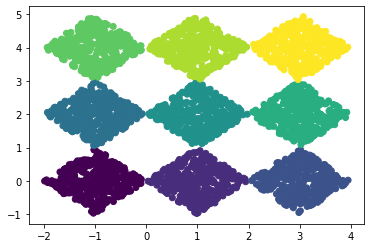

[SILHOUETTE] HDBSCAN de diamond9, meilleur avec min_cluster_size=8 et un score de 0.46771026869009114 : on trouve 10 labels


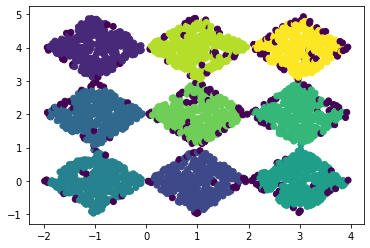

In [100]:
hdbscan_silhouette_score("diamond9")

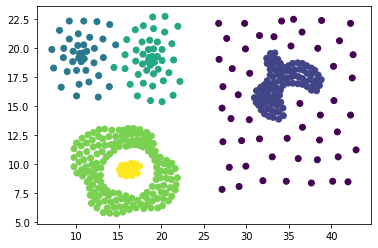

[SILHOUETTE] HDBSCAN de compound, meilleur avec min_cluster_size=30 et un score de 0.5362709035396878 : on trouve 3 labels


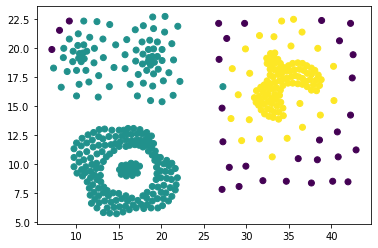

In [101]:
hdbscan_silhouette_score("compound")

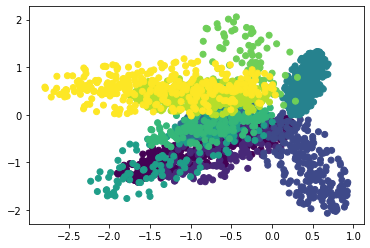

[SILHOUETTE] HDBSCAN de elly-2d10c13s, meilleur avec min_cluster_size=29 et un score de 0.2971524070963747 : on trouve 3 labels


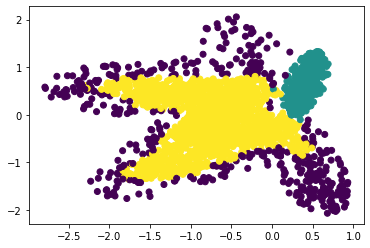

In [102]:
hdbscan_silhouette_score("elly-2d10c13s")